In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

For this assignment I will be using the Wine dataset UCI Machine Learning  Repository. The link for the dataset is given below.
https://archive.ics.uci.edu/ml/datasets/wine

In [205]:
# Let's load the Wine dataset in a dataframe and assign the Column names

wine = pd.read_csv('H:/Krishna/GCU/DSC 540/Topic 7/wine.data', sep=',', 
                   header=None,names=['Type','Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium',
                                      'Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins',
                                      'Color_Intensity','Hue','OD280','Proline'])
wine.describe()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [192]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Before we building the clustering the algorithm, we need to standardise the dataset. From above we can see that the 13 dimensional attributes are all of different values and for a proper model it is advised to standardise the data.

*Standardize Dataset*

In [220]:
from sklearn.preprocessing import StandardScaler

# The Stnadardscaler function will help in scaling the data
wine_std = pd.DataFrame(StandardScaler().fit_transform(wine.iloc[:,1:14]))
wine_std.columns=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols',
                  'Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']

In [221]:
wine_std.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [223]:
# Let us split the input data into the Predictor and Response variable
# We have a total of 13 Input variables here. We can try and build a model with all the 13 and see how our clusters look
X = wine_std
y = wine.iloc[:,-14]

[Text(0.5, 0, 'Alcohol'),
 Text(1.5, 0, 'Malic_Acid'),
 Text(2.5, 0, 'Ash'),
 Text(3.5, 0, 'Ash_Alcanity'),
 Text(4.5, 0, 'Magnesium'),
 Text(5.5, 0, 'Total_Phenols'),
 Text(6.5, 0, 'Flavanoids'),
 Text(7.5, 0, 'Nonflavanoid_Phenols'),
 Text(8.5, 0, 'Proanthocyanins'),
 Text(9.5, 0, 'Color_Intensity'),
 Text(10.5, 0, 'Hue'),
 Text(11.5, 0, 'OD280'),
 Text(12.5, 0, 'Proline')]

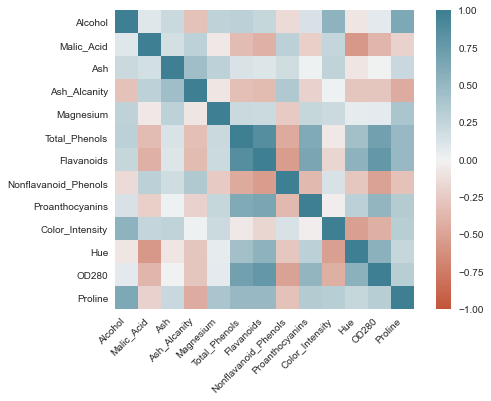

In [267]:
# Let us use a Correlation matrix to identify how the dimensional variables are correlated with each other in our wine dataset
corr=wine_std.iloc[:,0:13].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

*Selecting the Number of Clusters*

It is necessary that when we do a k-mean clustering we need to identify the optimal number of clusters. Not selecting the optimal number may often impact the overall efficiency of the model. Below we will use the Kelbow Visaulizer package to find the optimal k that we would need to model our wine data.

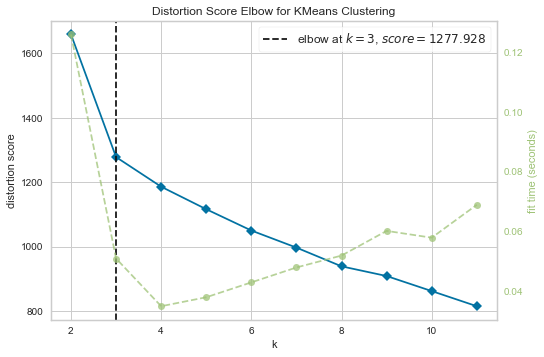

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [224]:
# Let us define the kmean model
model = KMeans()
# In order to identify the cluster we will select between k= 2 to 12 to see which has the better performance. 
# The below function plots the number of k against the sum of squared distance (distortion) for each k.
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X) 
visualizer.show() 

#Reference: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

By looking at the plot above we can very well conclude that the score is highest at k=3. Hence we will use 3 clusters for our k-mean algorithm. 

In [225]:
# Let us build the kmean algorithm using the Kmeans package from the skleran package.
# The n_clusters parameter has the number of cluster that need to be classified and the max_iter has the maximum number of iterations that is performed in a single run
km = KMeans(n_clusters=3,max_iter=300) 
y_km = km.fit_predict(X)

wine_std['Pred_Type'] = y_km

In [226]:
kmc=km.cluster_centers_
km.n_iter_

10

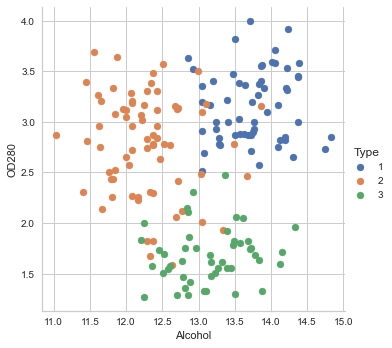

In [168]:
# Below is the scatter plot of the source data clustered based on the Alcohol Type.
sns.FacetGrid(wine, hue="Type", height=5,palette = 'deep').map(plt.scatter,'Alcohol','OD280').add_legend()
# We can see 3 clear clusters in the plot.


Text(0.5, 1.0, 'K-Mean with 13 inputs')

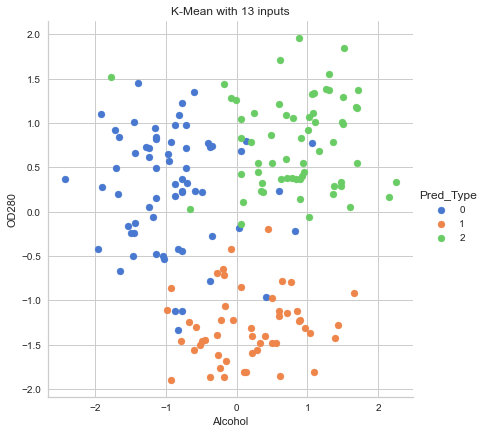

In [229]:
# Let's plot the outcome of the k-means cluster to see how the data is clustered
sns.FacetGrid(wine_std, hue="Pred_Type", height=6,palette = 'muted').map(plt.scatter,'Alcohol','OD280').add_legend()
plt.title('K-Mean with 13 inputs')
# Eventhough we can see three clusters, we do see that there is an overlap of the clustered groups.
# This is because of the number of input variables selected for our clustering model.
# In order to get an efficient clustering we need to get the most effective input variables.
# This can be achieved by the Principal Component Analysis (PCA)

*Principal Component Analysis (PCA)*

In [242]:
from sklearn.decomposition import PCA
# PCA function from the decomposition package is used to identify the Principal Component that provides the best variance in the output.
pca = PCA(n_components=13)
# In our case we are identifying the first two principal attributes
wine_std_pca = pca.fit_transform(wine_std.iloc[:,0:13])
pca.explained_variance_ratio_

# From the above we can see that the first two components in itself accounts for almost 56% of variance. 
# Hence we will use only two components for our k-mean clustering algorithm


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [251]:
# Select the first two principal components as input for the kmean
win_std_pca_in = pd.DataFrame(wine_std_pca, columns = ['PCA1','PCA2','PCA3','PCA4', 'PCA5', 'PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
X_PCA = win_std_pca_in.iloc[:,0:2]

In [255]:
# Let us re-run the kmean algorithm withe selected PCA component
km_PCA = KMeans(n_clusters=3,max_iter=300) 
y_km_PCA = km_PCA.fit_predict(X_PCA)

wine_std['Pred_Type_PCA'] = y_km_PCA
kmc_PCA=km_PCA.cluster_centers_


Let us plot the resulted k-mean cluster created using the PCA component and see how the new clustering looks compared to the older one.

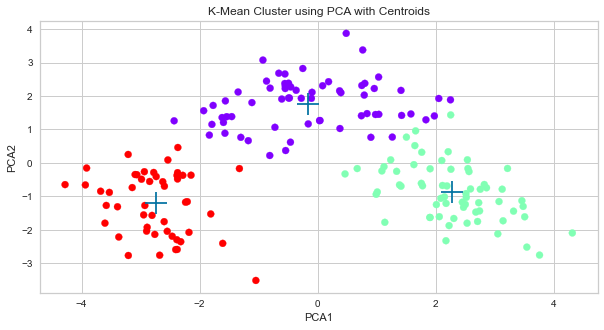

In [260]:
fig, (ax0) = plt.subplots(1, figsize=(10, 5))
ax0.set_title('K-Mean Cluster using PCA with Centroids')
ax0.scatter(X_PCA['PCA1'],X_PCA['PCA2'], c=y_km_PCA, cmap='rainbow')
ax0.scatter(kmc_PCA[:,0],kmc_PCA[:,1],  marker="+", s=500, c='b')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

From above we can very well see that the cluster boundaries are more prominent with almost no overlapping of the datapoints.